## Importing necessary libraries

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve,roc_auc_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf

## Reading the necessary csv files

In [ ]:
df = pd.read_csv("/content/Dev_data_to_be_shared.csv")

df.shape

(96806, 1216)

In [ ]:
X_val = pd.read_csv("/content/validation_data_to_be_shared.csv")

# EDA and Feature Selection

In [ ]:
df['bad_flag'].describe()

,bad_flag
count,96806.000000
mean,0.014173
std,0.118203
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


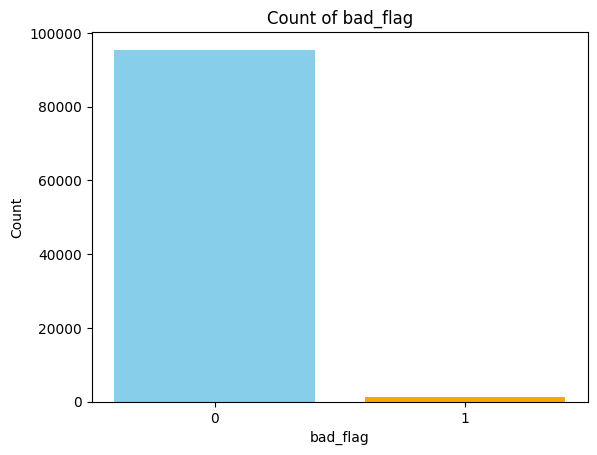

In [ ]:
# Count the occurrences of each target value
counts = df['bad_flag'].value_counts()

# Plot the bar chart
plt.bar(counts.index, counts.values, color=['skyblue', 'orange'])
plt.xticks([0, 1], ['0', '1'])
plt.xlabel('bad_flag')
plt.ylabel('Count')
plt.title('Count of bad_flag')
plt.show()


In [ ]:
df.isna().sum()

,0
account_number,0
bad_flag,0
onus_attribute_1,25231
transaction_attribute_1,25231
transaction_attribute_2,25231
...,...
onus_attribute_44,85196
onus_attribute_45,85196
onus_attribute_46,85196
onus_attribute_47,85196


In [ ]:
nan_counts = df.isna().sum()
print(nan_counts)

account_number                 0
bad_flag                       0
onus_attribute_1           25231
transaction_attribute_1    25231
transaction_attribute_2    25231
                           ...  
onus_attribute_44          85196
onus_attribute_45          85196
onus_attribute_46          85196
onus_attribute_47          85196
onus_attribute_48          85196
Length: 1216, dtype: int64


In [ ]:
target = 'bad_flag'
X = df.drop(columns=[target])
y = df[target]

### removing all those features whose variance is less than 0.01 as they don't contribute much to the model

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_variance_threshold.py:114: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)


Top 5 features with highest variance:
bureau_357: Variance 281662163088663.56
bureau_355: Variance 128942725500590.89
bureau_356: Variance 126124423194949.72
bureau_367: Variance 84499838288991.48
bureau_385: Variance 46416193742575.95


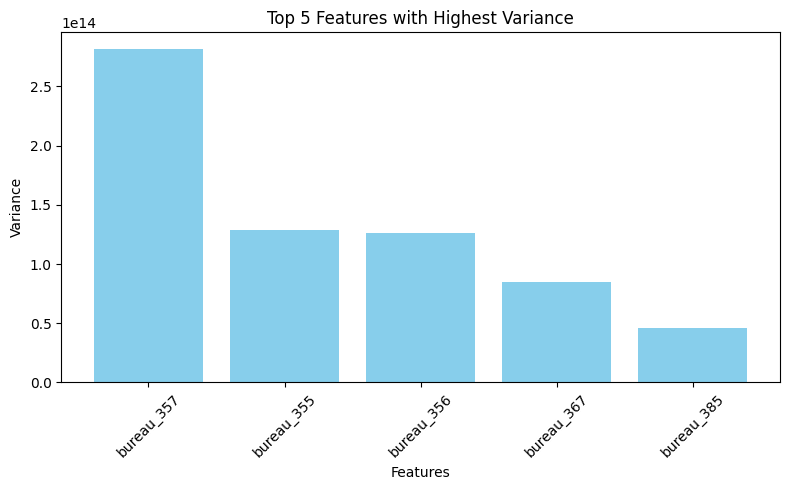

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Store original feature names
feature_names = X.columns  # Assuming X is a pandas DataFrame

# Initialize the VarianceThreshold selector
selector = VarianceThreshold(threshold=0.01)  # Remove features with variance below 0.01

# Fit the selector on training data
selector.fit(X_train)

# Transform the training and test data
X_train = selector.transform(X_train)
X_test = selector.transform(X_test)

X_val = selector.transform(X_val)

# Retain the names of selected features
selected_features = feature_names[selector.get_support(indices=True)]

# Identify features with the highest variance
variances = selector.variances_  # Get variances of features
feature_indices = np.argsort(-variances)  # Indices sorted by descending variance

# Optional: Display features with the highest variance
top_n = 5  # Number of top features to display
print(f"Top {top_n} features with highest variance:")
for i in range(top_n):
    print(f"{selected_features[feature_indices[i]]}: Variance {variances[feature_indices[i]]}")

# Plotting the features with highest variance
top_variances = variances[feature_indices[:top_n]]  # Get top-n variances
top_features = [selected_features[feature_indices[i]] for i in range(top_n)]  # Feature names

plt.figure(figsize=(8, 5))
plt.bar(top_features, top_variances, color='skyblue')
plt.title(f"Top {top_n} Features with Highest Variance")
plt.xlabel("Features")
plt.ylabel("Variance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Since the dataframe is very big, it is divided into 4 parts and plotted 4 correlation heatmaps

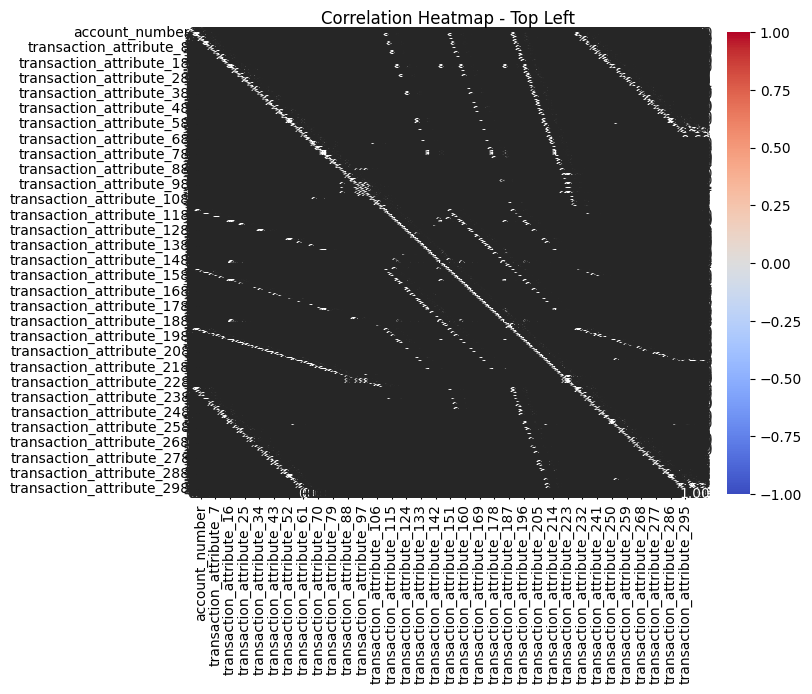

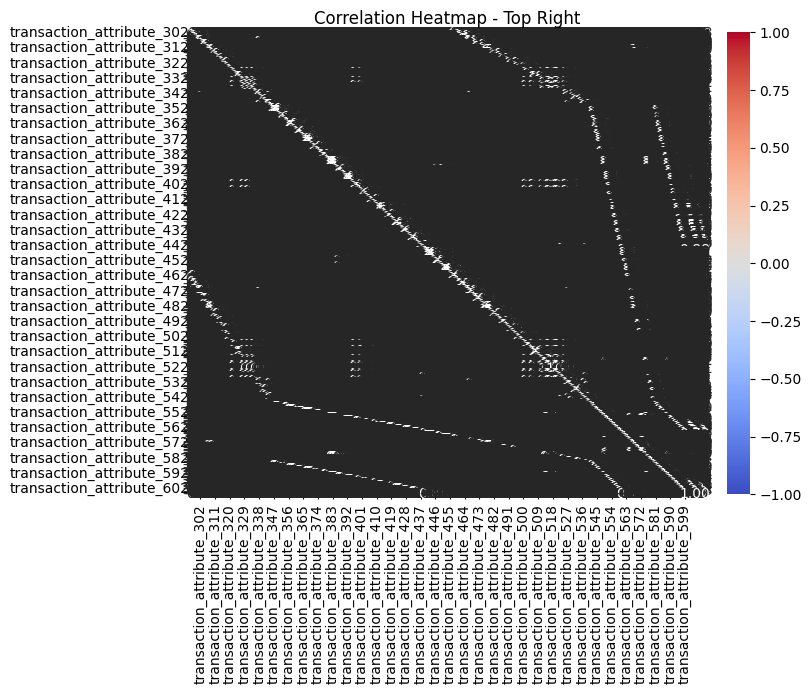

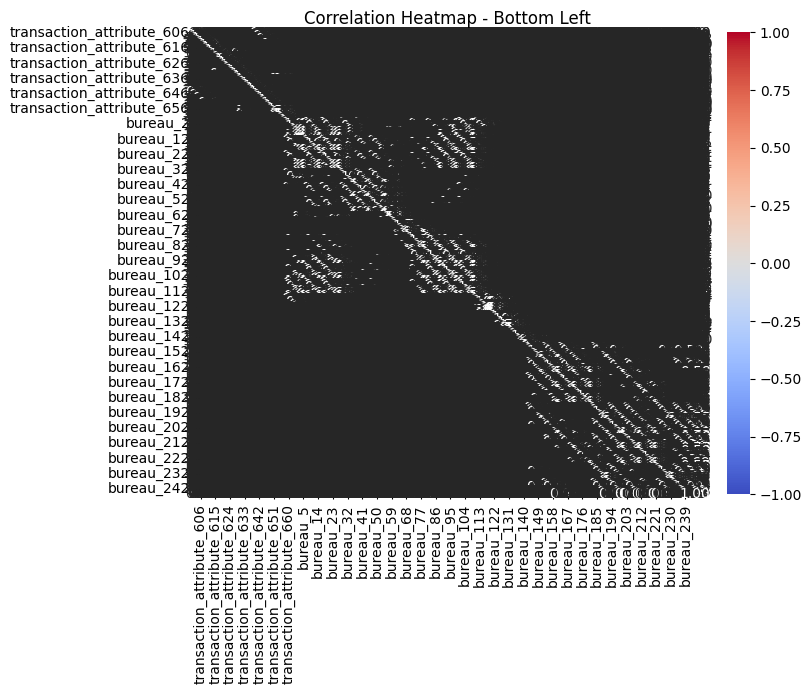

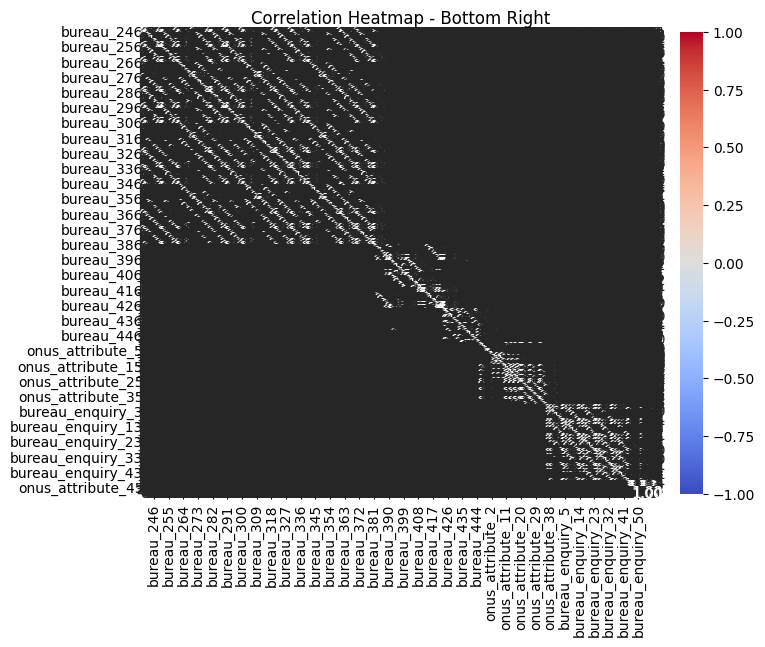

In [ ]:
# Function to divide dataframe into 4 parts
def divide_dataframe(df):
    num_columns = df.shape[1]
    mid = num_columns // 2
    # Divide the dataframe into four quadrants
    df1 = df.iloc[:, :mid//2]  # top-left
    df2 = df.iloc[:, mid//2:mid]  # top-right
    df3 = df.iloc[:, mid:3*mid//2]  # bottom-left
    df4 = df.iloc[:, 3*mid//2:]  # bottom-right
    return df1, df2, df3, df4

# Divide the dataframe
df1, df2, df3, df4 = divide_dataframe(df)

# Function to plot heatmap for each part
def plot_heatmap(data, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
    plt.title(title)
    plt.show()

# Plot correlation heatmaps for each part
plot_heatmap(df1, "Correlation Heatmap - Top Left")
plot_heatmap(df2, "Correlation Heatmap - Top Right")
plot_heatmap(df3, "Correlation Heatmap - Bottom Left")
plot_heatmap(df4, "Correlation Heatmap - Bottom Right")

### Observing which features have highest correlation with the target(bad_flag) variable

<ipython-input-67-4cf42ec7ee12>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_features.index, y=top_10_features.values, palette='viridis')


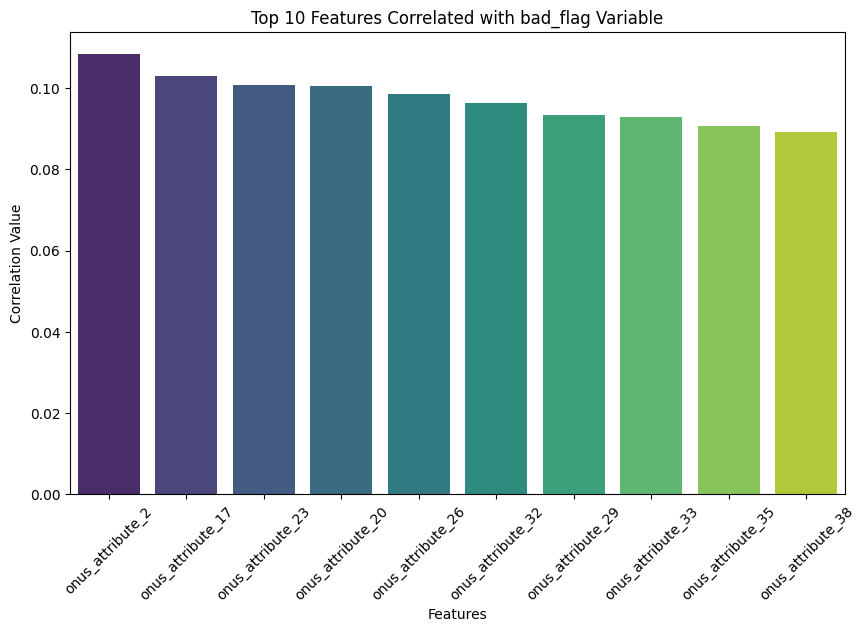

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Get correlations of features with the target variable
cor_target = correlation_matrix['bad_flag'].drop('bad_flag')  # Dropping the target column itself

# Get the top 10 features with the highest correlation
top_10_features = cor_target.abs().sort_values(ascending=False).head(10)

# Plot the top 10 features and their correlation values
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_features.index, y=top_10_features.values, palette='viridis')
plt.title("Top 10 Features Correlated with bad_flag Variable")
plt.xlabel("Features")
plt.ylabel("Correlation Value")
plt.xticks(rotation=45)
plt.show()

In [ ]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

### Observing which features have the most missing values and then handling those missing values

feature_names is : [785, 592, 784, 877, 876, 875, 874, 873, 872, 781]
RangeIndex(start=0, stop=878, step=1)
['bureau_119', 'transaction_attribute_590', 'bureau_118', 'bureau_211', 'bureau_210', 'bureau_209', 'bureau_208', 'bureau_207', 'bureau_206', 'bureau_115']


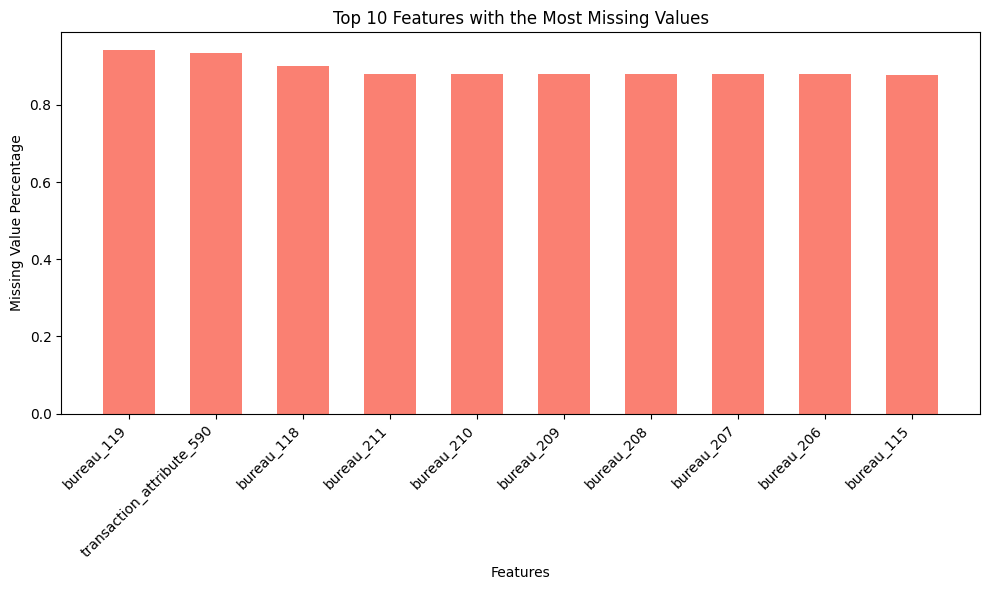

Top 10 features with the most missing values:
785: 94.11%
592: 93.52%
784: 90.01%
877: 87.92%
876: 87.92%
875: 87.92%
874: 87.92%
873: 87.92%
872: 87.92%
781: 87.80%


In [ ]:
# Calculate missing percentage in training data
missing_percentage = X_train.isnull().mean()

# Sort features by missing percentage in descending order
sorted_missing = missing_percentage.sort_values(ascending=False)

# Plot the top-n features with the most missing values
top_n = 10  # Number of features to display
top_missing_features = sorted_missing[:top_n]  # Get top-n features with the most missing values


# Convert feature indices to feature names for the x-axis
feature_names = top_missing_features.index.tolist()  # Get feature names

print(f'feature_names is : {feature_names}')

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_val = pd.DataFrame(X_val)

print(X_train.columns)
column_names = df.columns[feature_names].tolist()
print(column_names)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(column_names, top_missing_features.values, color='salmon', width=0.6)
plt.title(f"Top {top_n} Features with the Most Missing Values")
plt.xlabel("Features")
plt.ylabel("Missing Value Percentage")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Optional: Print the features with the most missing values
print(f"Top {top_n} features with the most missing values:")
for feature, percentage in top_missing_features.items():
    print(f"{feature}: {percentage:.2%}")


In [ ]:
# Identify columns to drop (more than 50% NaN)
columns_to_drop = sorted_missing[sorted_missing > 0.5].index

# Drop columns in both train and test sets
X_train = X_train.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)
X_val = X_val.drop(columns=columns_to_drop)

# Fill remaining missing values with the mean
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())
X_val = X_val.fillna(X_val.mean())

In [ ]:
X_train.shape

(77444, 861)

In [ ]:
y_train.shape

(77444,)

# Feature Selection

### Using RandomForestClassifierto get the top 150 features which contribute much to the classification process and then applying smote for tackling class imbalance

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Step 1: Train a Random Forest Model
model = RandomForestClassifier(random_state=42, n_estimators=150)
model.fit(X_train, y_train)

# Step 2: Extract Feature Importances
importances = model.feature_importances_

# Create a DataFrame for feature importance
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Step 3: Calculate Cumulative Importance
feature_importances['Cumulative Importance'] = feature_importances['Importance'].cumsum()

# Step 4: Select Features Based on Cumulative Importance Threshold
threshold = 0.95  # Retain features contributing to 95% of total importance
selected_features = feature_importances[feature_importances['Cumulative Importance'] <= threshold]['Feature']

# Step 5: Filter the Dataset to Include Only Selected Features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
X_val_selected = X_val[selected_features]

print(f"Selected {len(selected_features)} features based on embedded method.")


#SMOTE
from imblearn.over_sampling import SMOTE

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_selected, y_train)

print(f"Original training set size: {X_train_selected.shape[0]}")
print(f"Training set size after SMOTE: {X_train_smote.shape[0]}")

Selected 619 features based on embedded method.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Original training set size: 77444
Training set size after SMOTE: 152684


In [ ]:
y_train_smote.shape

(152684,)

In [80]:
X_train_smote.shape

(152684, 619)

In [81]:
y_train_smote.shape

(152684,)

### Using auto_encoder to reduced dimension while still capturing key features

In [82]:
from sklearn.preprocessing import StandardScaler

# Assuming X_train and X_test are your datasets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test_selected)
X_val_scaled = scaler.transform(X_val_selected)



In [83]:
print(X_test_scaled.shape)
print(y_train_smote.shape)
print(y_test.shape)
print(X_train_scaled.shape)
X_test_scaled.shape


(19362, 619)
(152684,)
(19362,)
(152684, 619)


(19362, 619)

In [84]:
print(y_test.shape)
print(y_train.shape)

(19362,)
(77444,)


In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

input_dim = X_train_scaled.shape[1]  # Number of features
encoding_dim = 50  # Bottleneck size (desired reduced dimensionality)

only_autoencoder = Sequential([
    Input(shape=(input_dim,)),
    Dense(128, activation='relu'),  # Encoder
    Dense(encoding_dim, activation='relu'),  # Bottleneck layer
    Dense(128, activation='relu'),  # Decoder
    Dense(input_dim, activation='sigmoid')  # Reconstruct original dimensions
])


In [141]:
only_autoencoder.compile(optimizer='adam', loss='mse')

only_autoencoder.fit(
    X_train_scaled, X_train_scaled,  # Input and target are the same
    epochs=200,
    batch_size=256,
    shuffle=True,
    validation_split=0.2  # Use 20% of the data for validation
)


Epoch 1/200
478/478 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - loss: 0.7948 - val_loss: 0.4585
Epoch 2/200
478/478 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.7764 - val_loss: 0.4589
Epoch 3/200
478/478 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.7995 - val_loss: 0.4587
Epoch 4/200
478/478 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - loss: 0.8238 - val_loss: 0.4588
Epoch 5/200
478/478 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.8090 - val_loss: 0.4581
Epoch 6/200
478/478 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.8456 - val_loss: 0.4581
Epoch 7/200
478/478 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.8558 - val_loss: 0.4585
Epoch 8/200
478/478 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.8476 - val_loss: 0.4582
Epoch 9/200
478/478 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.9303 - val_loss: 0.4581
Epoch 10/200
478/478 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - loss: 0.8492 - val_loss: 0.4581
Epoch 11/200
478/478 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - loss: 0.8164 - val_loss: 0.4579
Epoch 12/200
478/478 ━━━━

In [142]:
encoder = Sequential(only_autoencoder.layers[:2])  # Keep layers up to the bottleneck
X_train_encoded = encoder.predict(X_train_scaled)
X_test_encoded = encoder.predict(X_test_scaled)
X_val_encoded = encoder.predict(X_val_scaled)

4772/4772 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step
606/606 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1306/1306 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [143]:
X_train_encoded.shape

(152684, 50)

In [144]:
y_train_smote.shape

(152684,)

In [145]:
y_test.shape

(19362,)

In [146]:
X_test_encoded.shape

(19362, 50)

# Classification

### Using XGBoost classifier as it was giving the best f1 score in all the models that we have tried

In [147]:
!pip install xgboost --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 1.4 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.7.6
    Uninstalling xgboost-1.7.6:
      Successfully uninstalled xgboost-1.7.6


In [148]:
import xgboost
import sklearn
print("XGBoost version:", xgboost.__version__)
print("Scikit-learn version:", sklearn.__version__)

XGBoost version: 2.1.3
Scikit-learn version: 1.6.0


[0 0 1 ... 0 0 0]
AUC Score: 0.75
F1_Score: 0.13
Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     19092
           1       0.11      0.16      0.13       270

    accuracy                           0.97     19362
   macro avg       0.55      0.57      0.56     19362
weighted avg       0.98      0.97      0.97     19362



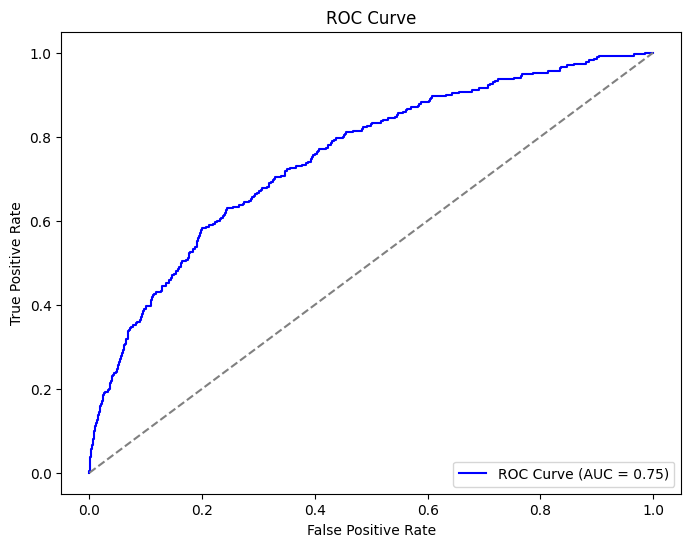

In [167]:
import xgboost as xgb
from sklearn.metrics import accuracy_score,f1_score

# Initialize XGBoost Classifier
model = xgb.XGBClassifier(
    max_depth=10,
    learning_rate=0.1,
    gamma=0,
    n_estimators=275,
    subsample=0.75,
    colsample_bytree=0.75,
    random_state=42,
    min_child_weight=3,
    # Explicitly set objective and eval_metric if necessary
    objective='binary:logistic',  # For binary classification
    eval_metric='logloss'
)

# Ensure X_train_encoded and y_train are NumPy arrays
X_train_encoded = X_train_encoded.astype(np.float32) # Converting to np.float32
# y_train = y_train.to_numpy() # Converting to NumPy array


# Train the model
model.fit(X_train_encoded, y_train_smote)

# Make predictions
y_proba = model.predict_proba(X_test_encoded)
threshold = 0.5  # Change this based on your precision-recall tradeoff
y_pred = (y_proba[:, 1] >= threshold).astype(int) # Selecting the probability for the positive class
print(y_pred)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
# Compute AUC ROC score
auc_score = roc_auc_score(y_test, y_proba[:, 1])
print(f"AUC Score: {auc_score:.2f}")
print(f"F1_Score: {f1_score:.2f}")
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

# Generate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


### Predicting validation probabilities and saving it in csv file

In [163]:
y_val_proba = model.predict_proba(X_val_encoded)
y_val_pred = (y_val_proba >= threshold).astype(int)
print(y_val_pred)

[[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]


In [164]:
dataframe = pd.DataFrame({
    'account_number': X_val.iloc[:,0],  # Assuming 'account_number' was the first column originally
    'bad_flag': y_val_proba[:,1] # Accessing probability for positive class
})

In [166]:
dataframe.to_csv('submission.csv', index=False)